<a href="https://colab.research.google.com/gist/TN-CustomML/b283daac069f4261e910862336c8be28/intro_time_series_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup **Environment**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Data import
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()

#For mounting to drive
from google.colab import drive

#Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

#Modeling Metrics
from sklearn import metrics


  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=bb039d61d087df219933b913f63e33a258f46ba578b46709e49121487d9d4484
  Stored in directory: /tmp/pip-ephem-wheel-cache-ac5j_s3r/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [0]:
from google.colab import drive
drive.mount('/content/drive')

aapl_data = pd.read_csv('/content/drive/My Drive/siraj_homework/AAPL.csv')

# Import Data and **Discovery**

In [0]:
df_full = pdr.get_data_yahoo("AAPL", start="2018-01-03").reset_index()



[*********************100%***********************]  1 of 1 downloaded


In [0]:
df_full.shape

(427, 7)

In [0]:
df_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-03,172.529999,174.550003,171.960007,172.229996,167.672668,29517900
1,2018-01-04,172.539993,173.470001,172.080002,173.029999,168.451508,22434600
2,2018-01-05,173.440002,175.369995,173.050003,175.000000,170.369385,23660000
3,2018-01-08,174.350006,175.610001,173.929993,174.350006,169.736588,20567800
4,2018-01-09,174.550003,175.059998,173.410004,174.330002,169.717117,21584000


In [0]:
df_full.describe()

,Open,High,Low,Close,Adj Close,Volume
count,427.000000,427.000000,427.000000,427.000000,427.000000,4.270000e+02
mean,189.314356,191.216159,187.535363,189.389789,186.914089,3.193997e+07
std,19.700690,19.788287,19.619066,19.707671,19.933257,1.363339e+07
min,143.979996,145.720001,142.000000,142.190002,140.505798,1.136200e+07
25%,174.200005,175.224998,172.790001,174.264999,171.243225,2.235755e+07
50%,188.380005,189.779999,186.779999,188.580002,185.765717,2.848120e+07
75%,204.294998,206.434998,203.084999,204.514999,203.413414,3.797215e+07
max,230.779999,233.470001,229.779999,232.070007,228.523819,9.624670e+07


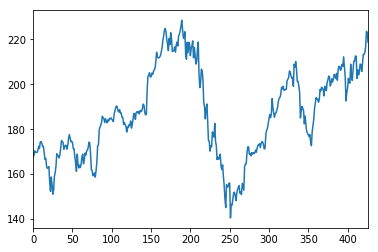

In [0]:
df_full["Adj Close"].plot()

# Data **Preprocessing**

In [0]:
df_full.set_index("Date", inplace=True)

In [0]:
df_full.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-03,172.529999,174.550003,171.960007,172.229996,167.672668,29517900
2018-01-04,172.539993,173.470001,172.080002,173.029999,168.451508,22434600
2018-01-05,173.440002,175.369995,173.050003,175.000000,170.369385,23660000
2018-01-08,174.350006,175.610001,173.929993,174.350006,169.736588,20567800
2018-01-09,174.550003,175.059998,173.410004,174.330002,169.717117,21584000


In [0]:
window_size=32
num_samples=len(df_full)-window_size

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = df_full['Adj Close'].values[indices] # Create the 2D matrix of training samples
x = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day

In [0]:
x

array([[167.672668, 168.451508, 170.369385, ..., 163.605591, 169.099213,
        168.551804],
       [168.451508, 170.369385, 169.736588, ..., 169.099213, 168.551804,
        167.984848],
       [170.369385, 169.736588, 169.717117, ..., 168.551804, 167.984848,
        167.222412],
       ...,
       [206.95369 , 208.886337, 207.989746, ..., 213.259995, 214.169998,
        216.699997],
       [208.886337, 207.989746, 212.233627, ..., 214.169998, 216.699997,
        223.589996],
       [207.989746, 212.233627, 207.641068, ..., 216.699997, 223.589996,
        223.089996]])

In [0]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [0]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [0]:
y_test.shape

(79,)

In [0]:
x_test.shape

(79, 32)

# **Modeling**

In [0]:
#Help Functions
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

# **Baseline**

In [0]:
y_pred_lag=np.roll(y_test,1)

In [0]:
get_performance(y_pred_lag)

Mean Absolute Error: 2.9978
Mean Squared Error: 31.0208
Root Mean Squared Error: 5.5696


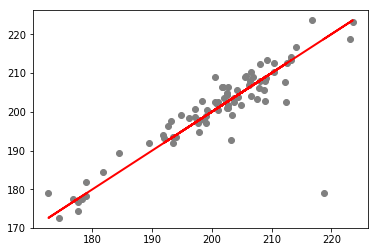

In [0]:
get_plot(y_pred_lag)

# Linear **Regression**

In [0]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

In [0]:
y_pred_lr=model_lr.predict(x_test)

In [0]:
get_performance(y_pred_lr)

Mean Absolute Error: 2.9529
Mean Squared Error: 13.9516
Root Mean Squared Error: 3.7352


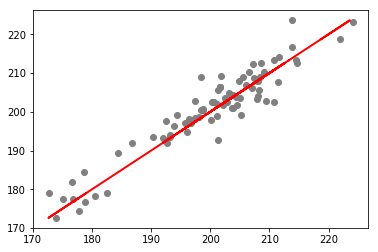

In [0]:
get_plot(y_pred_lr)

In [0]:
get_performance(y_pred_lr)

Mean Absolute Error: 2.9529
Mean Squared Error: 13.9516
Root Mean Squared Error: 3.7352


# Method #1 Ridge **Regression**

In [0]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(x_test)

In [0]:
get_performance(y_pred_ridge)

Mean Absolute Error: 2.9526
Mean Squared Error: 13.9491
Root Mean Squared Error: 3.7349


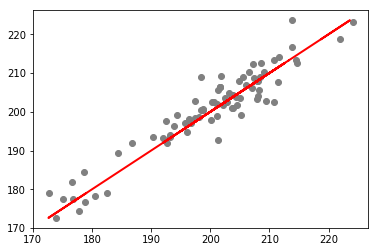

In [0]:
get_plot(y_pred_ridge)

# Gradient Boosting **Trees**

In [0]:
# Model #2 - Gradient Boosting Trees
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

# Infer
y_pred_gb = model_gb.predict(x_test)

In [0]:
get_performance(y_pred_gb)

Mean Absolute Error: 3.5496
Mean Squared Error: 18.367
Root Mean Squared Error: 4.2857


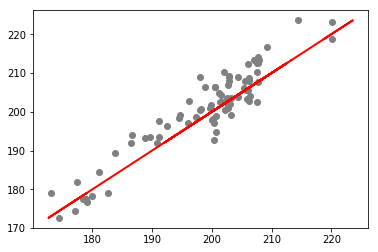

In [0]:
get_plot(y_pred_gb)

# **Comparison**

In [0]:
df_comp=pd.DataFrame({"lag":np.absolute(y_test-y_pred_lag), 
              "lr":np.absolute(y_test-y_pred_lr), 
              "ridge":np.absolute(y_test-y_pred_ridge),
              "gb":np.absolute(y_test-y_pred_gb)})

(9, 20)

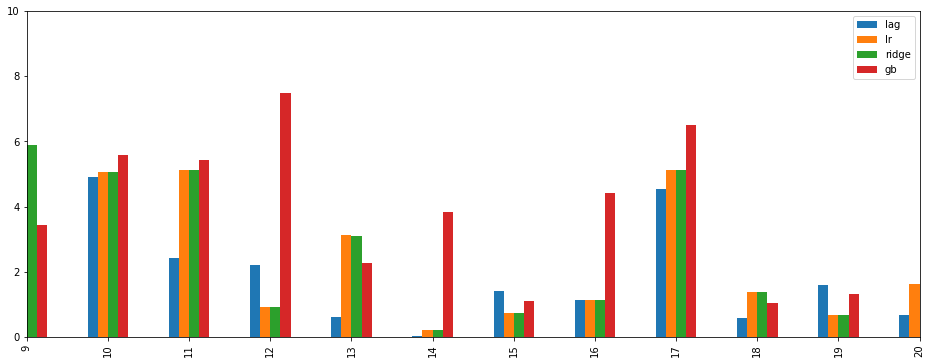

In [0]:

df_comp.plot.bar(figsize=(16, 6))
plt.ylim(0,10)
plt.xlim(9,20)

# **Resources**

- [In 12 minutes: Stocks Analysis with Pandas and Scikit-Learn](https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7)
- [A beginner’s guide to Linear Regression in Python with Scikit-Learn](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)